<a href="https://colab.research.google.com/github/Anvayt24/Waste-Segregation/blob/main/clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [12]:

dataset_path = '/content/dataset-resized'

In [ ]:
import os

if os.path.exists(dataset_path):
    print(f"The directory '{dataset_path}' exists.")
else:
    print(f"The directory '{dataset_path}' does not exist.")

The directory '/content/dataset-resized' does not exist.


In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

In [13]:
train_data = datagen.flow_from_directory (
    dataset_path,
    target_size = (128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 2024 images belonging to 6 classes.


In [14]:
val_data = datagen.flow_from_directory (
    dataset_path,
    target_size = (128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 503 images belonging to 6 classes.


In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,414 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(
    train_data,
    validation_data = val_data,
    epochs=25,

    callbacks=[early_stopping]
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 359ms/step - accuracy: 0.2419 - loss: 1.7097 - val_accuracy: 0.3161 - val_loss: 1.6361
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 207ms/step - accuracy: 0.3926 - loss: 1.5068 - val_accuracy: 0.3439 - val_loss: 1.5411
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 186ms/step - accuracy: 0.4363 - loss: 1.3794 - val_accuracy: 0.3698 - val_loss: 1.5185
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.4247 - loss: 1.3954 - val_accuracy: 0.3777 - val_loss: 1.5036
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.4586 - loss: 1.3514 - val_accuracy: 0.3936 - val_loss: 1.4557
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.4992 - loss: 1.2693 - val_accuracy: 0.3837 - val_loss: 1.4300
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 224ms/step - accuracy: 0.4716 - loss: 1.2849 - val_accuracy: 0.4155 - val_loss: 1.4208
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - accuracy: 0.5163 - loss: 1.2365 - val_accuracy: 0.409

In [19]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.4788 - loss: 1.3225
Validation Loss: 1.2703421115875244
Validation Accuracy: 0.4990059733390808


In [20]:
import matplotlib.pyplot as plt

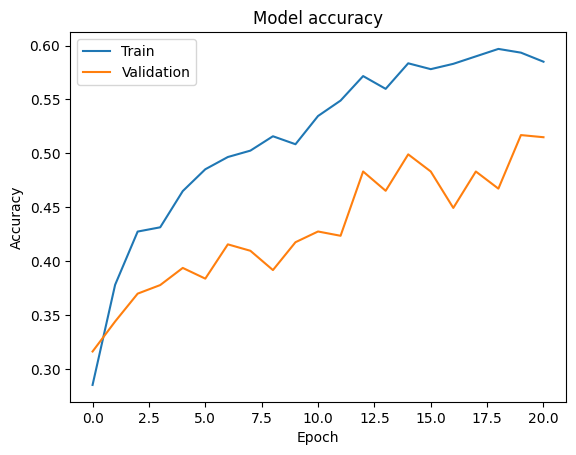

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

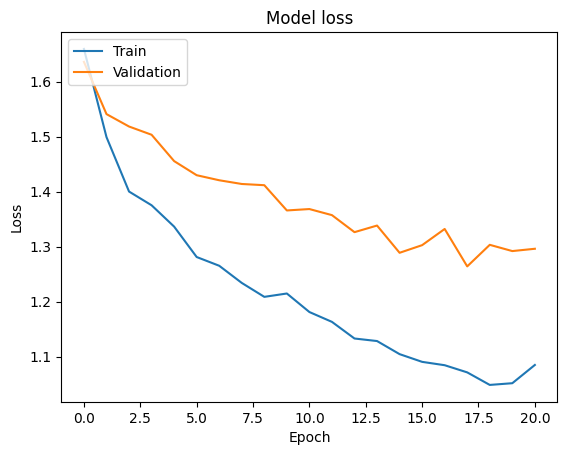

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()